# 회귀
- 소득이 증가하면 소비가 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성으로 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘



## 회귀 평가 지표:
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것 ( 실제 오류 평균보다 커지는 것을 보정 )
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
- 1에 가까울 수록 예측 정확도가 높음, 예측값 Variance / 실제값 Variance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [4]:
ls

auto-mpg.xlsx  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df= pd.read_excel('./auto-mpg.xlsx')
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.horsepower[ndf.horsepower == '?'] = np.nan 
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.convert_dtypes()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [ ]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [ ]:
from sklearn.model_selection import train_test_split
X=ndf[['weight']]
y=ndf['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.3,
                                                random_state=11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

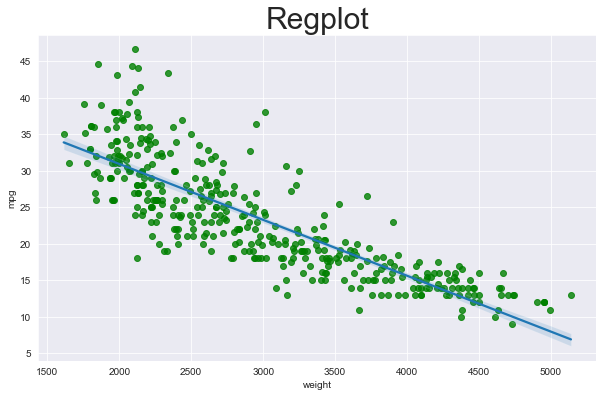

In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [ ]:
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)
#X_test
#y_preds

기울기 :  [-0.00762163]
절편 :  45.97121770475769


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse : {mse}, rmse : {rmse}, r_square : {r_square}')

mse : 22.168955157340807, rmse : 4.70839199274453, r_square : 0.6410608728212728


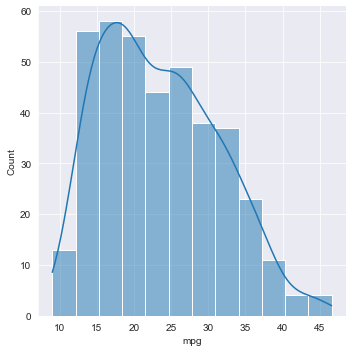

In [ ]:
sns.displot(y,kde=True)

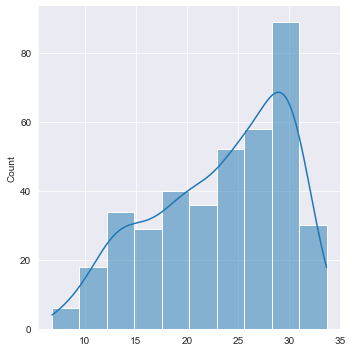

In [ ]:
y_hat = lr.predict(X)
sns.displot(y_hat,kde=True)

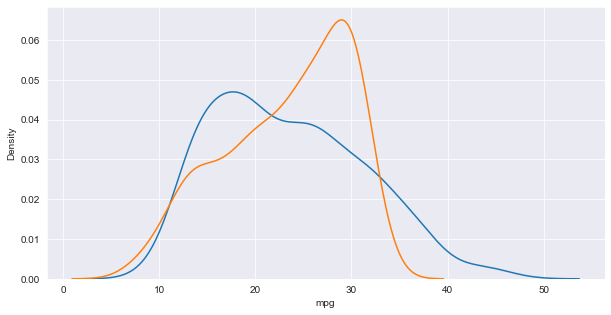

In [ ]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False,label='y')
ax2=sns.distplot(y_hat,hist=False,label='y_hat')

## 다항 희귀 분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임, 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [ ]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [ ]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [ ]:
pr=LinearRegression()
pr.fit(X_train_poly,y_train)
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6368479947376222

In [ ]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723444


Text(0, 0.5, 'mpg')

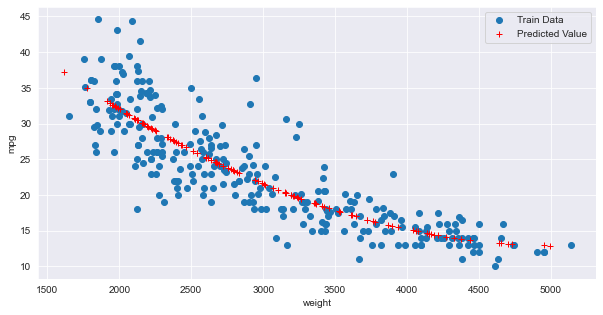

In [ ]:
y_hat_test = pr.predict(X_test_poly)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

In [ ]:
#[과제] X데이터를 X_poly 데이터셋을 변환하여 2차 함수로 만들어진 데이터셋을 예측하고 시각화 하세요.
# 0~1 사이의 균일분포
import numpy as np
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

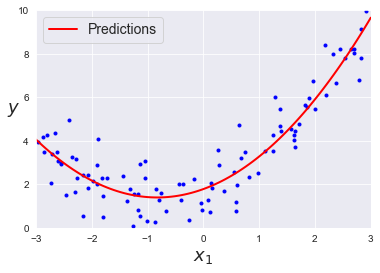

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

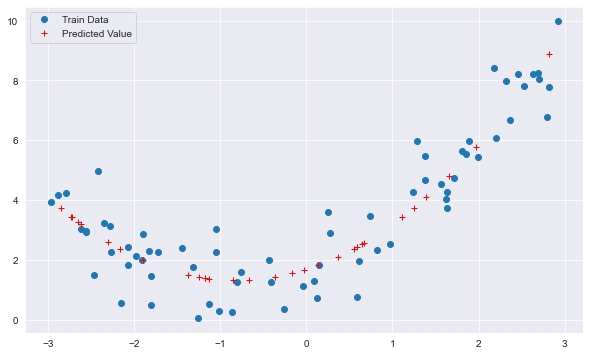

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [ ]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중 회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [ ]:
df=pd.read_pickle('./dataset/auto-mpg.pkl')
df

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [ ]:
X=df.drop('mpg',axis=1)
y=df['mpg']
X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
r_square

0.6939048496695599

In [ ]:
#mse,rmse,r2_score
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)
mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse : {mse}, rmse : {rmse}, r_square : {r_square}')

기울기 :  [-0.60691288 -0.03714088 -0.00522268]
절편 :  46.414351269634025
mse : 17.33008562898995, rmse : 4.16294194398504, r_square : 0.6939048496695599


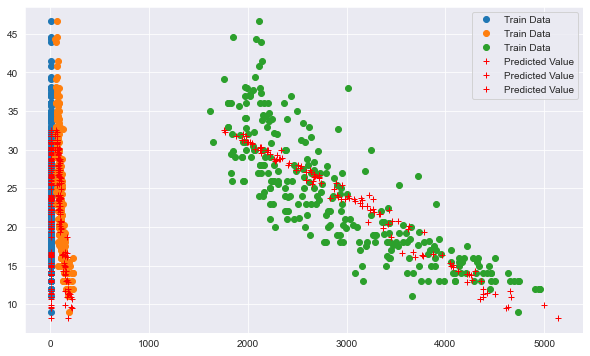

In [ ]:
#[과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


38     14.0
172    25.0
277    16.2
196    24.5
357    32.9
       ... 
375    36.0
322    46.6
15     22.0
127    19.0
267    27.5
Name: mpg, Length: 274, dtype: float64

In [ ]:
[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

#CRIM 자치시(town) 별 1인당 범죄율
#ZN 25,000 평방피트를 초과하는 거주지역의 비율
#INDUS 비소매상업지역이 점유하고 있는 토지의 비율
#CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
#NOX 10ppm 당 농축 일산화질소
#RM 주택 1가구당 평균 방의 개수
#AGE 1940년 이전에 건축된 소유주택의 비율
#DIS 5개의 보스턴 직업센터까지의 접근성 지수
#RAD 방사형 도로까지의 접근성 지수
#TAX 10,000 달러 당 재산세율
#PTRATIO 자치시(town)별 학생/교사 비율
#B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
#LSTAT 모집단의 하위계층의 비율(%)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
boston_df.corr()
#Lstat
#RM
#Ptratio
#indus
#NOX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1440x1440 with 0 Axes>

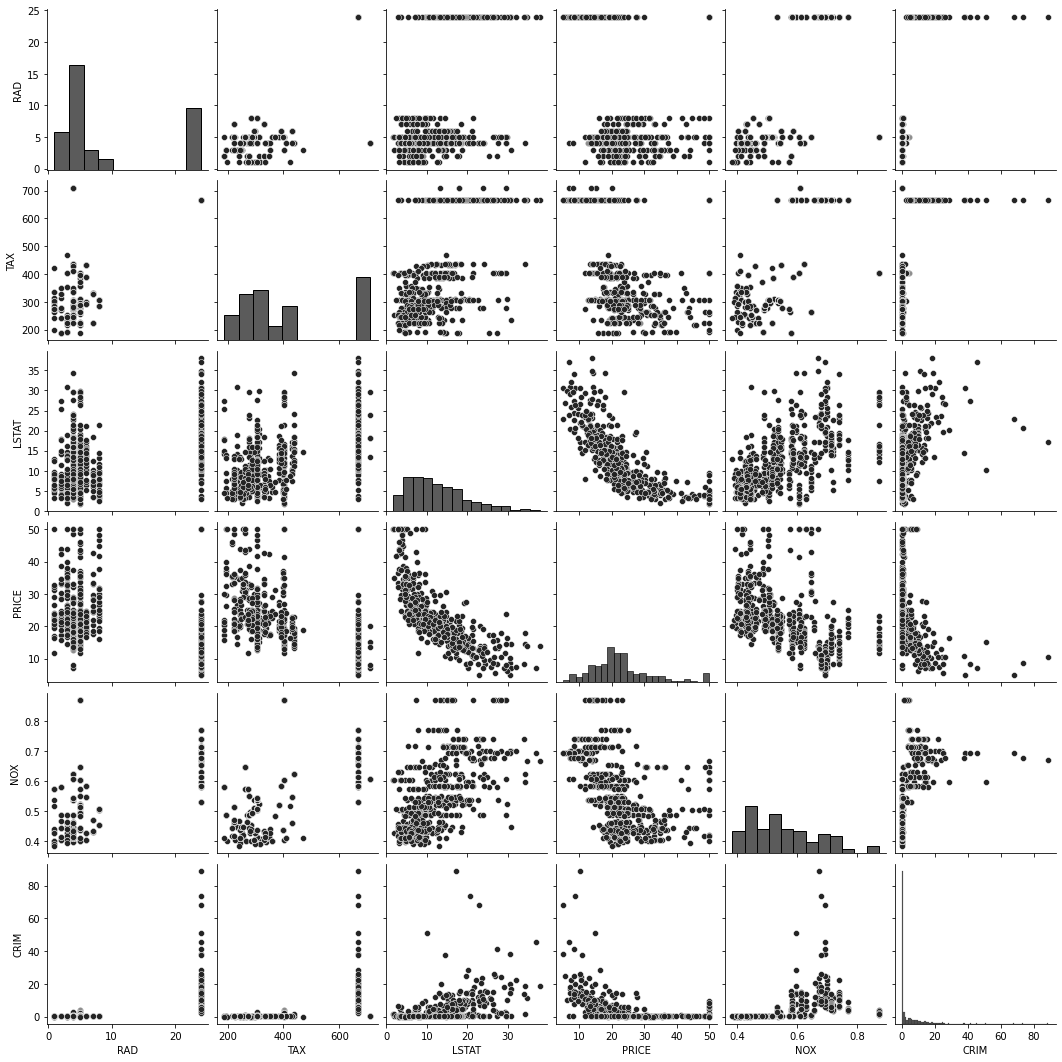

In [19]:
# crim 과 높은 상관관계 (필요한 과정인지 생각해 봐야할 문제 과대적합 문제 해결역활 기대)
boston_df_view=boston_df[['RAD', 'TAX', 'LSTAT', 'PRICE','NOX','CRIM']]
plt.figure(figsize=(20,20))
sns.set_palette('gray')
sns.pairplot(boston_df_view)

<Figure size 1440x1440 with 0 Axes>

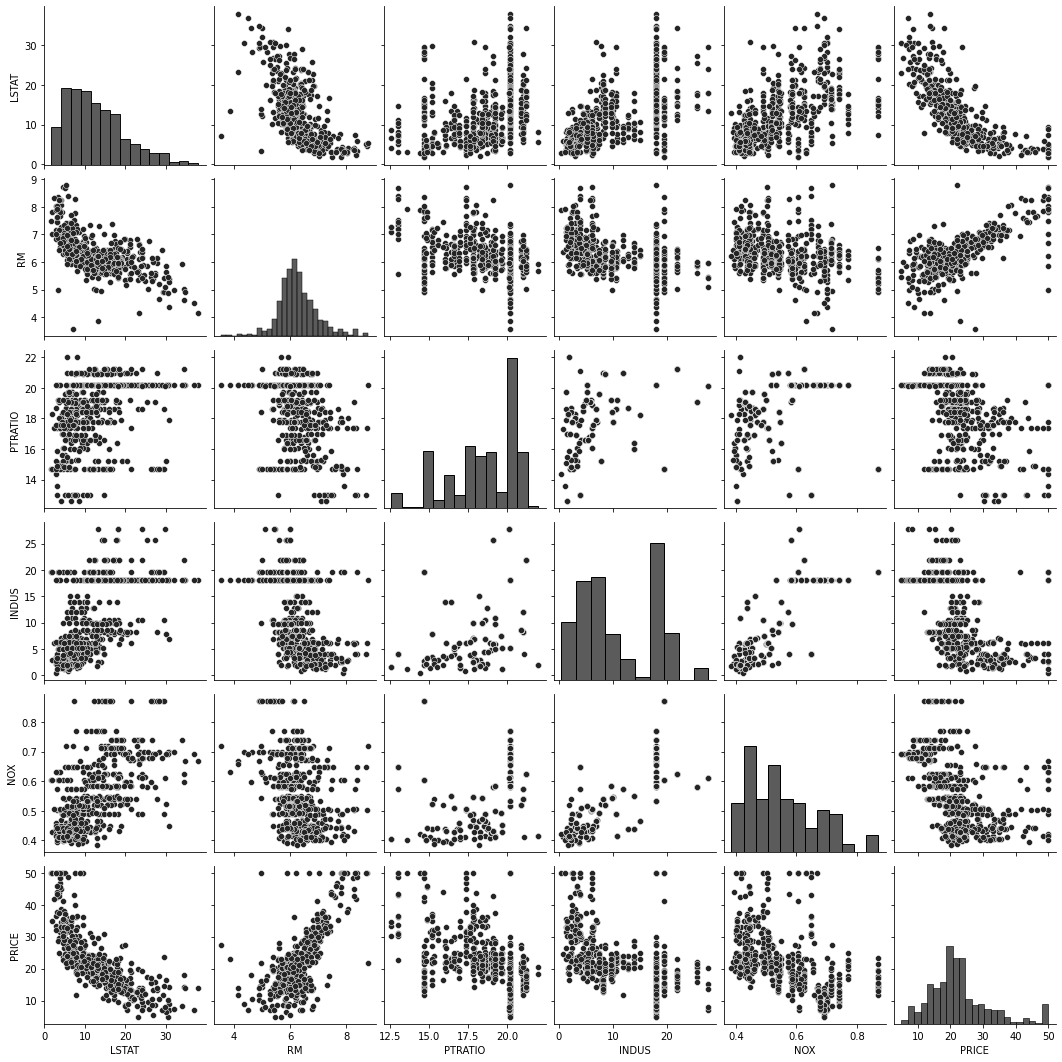

In [18]:
boston_df_view=boston_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS','NOX','PRICE']]
plt.figure(figsize=(20,20))
sns.set_palette('gray')
sns.pairplot(boston_df_view)

#상관관계가 뚜렸히 보이는 것은 lstat 와 rm 정도 나머지는 이상치가 많아 보임.

In [51]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [122]:
# 0~1로 스케일링 데이터 전처리
from sklearn.preprocessing import MinMaxScaler
def format_features(df):
    x = df
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return(df)

#모든 행을 살리는게 결과 값이 좋음.
X=boston_df.drop(['CRIM','ZN','CHAS','AGE','DIS','RAD','TAX','B','PRICE'],axis=1) # 연구필요
# X=boston_df.drop('PRICE',axis=1)
y=boston_df['PRICE']
X=format_features(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=11)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
print(r_square)

0.6824069353614228


In [119]:
#모든 행을 살린경우
from sklearn.metrics import mean_squared_error, r2_score
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)
mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse : {mse}, rmse : {rmse}, r_square : {r_square}')

기울기 :  [ -9.58269792   4.67799551   1.16455881   2.72099245  -9.23558812
  21.43934564   1.50205653 -14.76082145   8.48426589  -8.13358029
  -8.53137318   4.34079581 -18.28895399]
절편 :  23.621107719069418
mse : 25.014130701654313, rmse : 5.0014128705451135, r_square : 0.7263263285991056


In [123]:
# 주요 행만 살린경우

기울기 :  [  1.84326515  -2.44851857  25.28233251  -8.56942846 -18.85620796]
절편 :  20.589270229337707
mse : 29.02842055701802, rmse : 5.387802943410052, r_square : 0.6824069353614228


In [116]:
y_test

53     23.4
490     8.1
240    22.0
375    15.0
417    10.4
       ... 
170    17.4
347    23.1
155    15.6
228    46.7
355    20.6
Name: PRICE, Length: 152, dtype: float64